In [1]:
import tensorflow as tf

In [2]:
# 1개가 뜨면 정상작동
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Version :", tf.__version__)

Num GPUs Available:  0
Version : 2.10.0


In [3]:
# 균일분포 난수 생성 (min=0, max=1)
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.25113368], shape=(1,), dtype=float32)


In [4]:
# 균일분포 난수 생성
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.01385307 0.7842504  0.15484178 0.3966055 ], shape=(4,), dtype=float32)


In [5]:
# 정규분포 난수 생성 (mean=0, sd=1)
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([ 0.5295305   1.4582971  -0.46309313 -0.08140331], shape=(4,), dtype=float32)


In [6]:
# 활성화함수(activate function)
# 1. sigmoid S(z): 1/(1+exp(-z))
# 2. ReLu R(x) : max(0, x)

# 구현
import math
def sigmoid(x) :
    return 1 / (1+math.exp(-x))

In [7]:
x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x * w)
print(output)

0.4834533279484699


In [8]:
# 경사하강법(Gradient Descent) 간단 구현
# 목적 : sigmoid(1*w)->0이 되게 하는 w 최적화
for i in range(1000) :
    output = sigmoid(x * w)
    error = output - y
    w = w - x * 0.1 * error
    
    if i % 100 == 99 :
        print(i, error, output)

99 0.10075948783757153 0.10075948783757153
199 0.051967408633313734 0.051967408633313734
299 0.03467362100841948 0.03467362100841948
399 0.025936592544860665 0.025936592544860665
499 0.020688758288159664 0.020688758288159664
599 0.017195088327115686 0.017195088327115686
699 0.014704787536348157 0.014704787536348157
799 0.01284118212501332 0.01284118212501332
899 0.011394798269157121 0.011394798269157121
999 0.01023995728093401 0.01023995728093401


In [9]:
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000) :
    output = sigmoid(x * w + 1 * b)
    error = output - y
    w = w - x * 0.1 * error
    b = b - 1 * 0.1 * error
    
    if i % 100 == 99 :
        print(i, error, output)

99 -0.09400085927806101 0.905999140721939
199 -0.05002114992211659 0.9499788500778834
299 -0.03378181648626899 0.966218183513731
399 -0.02543021527029421 0.9745697847297058
499 -0.020363658894315795 0.9796363411056842
599 -0.016969155193936714 0.9830308448060633
699 -0.014538871909108964 0.985461128090891
799 -0.012714259819850304 0.9872857401801497
899 -0.011294573683610754 0.9887054263163892
999 -0.010158868323141834 0.9898411316768582


#  

## 첫 번째 신경망 네트워크 : AND
<table align = "left">
    <th> 입력1 </th>
    <th> 입력2 </th>
    <th> AND결과 </th>
    <tr> 
        <td> True </td>
        <td> True </td>
        <td> True </td>
    </tr>
    <tr>
        <td> True </td>
        <td> False </td>
        <td> False </td>
    </tr>
    <tr>
        <td> False </td>
        <td> True </td>
        <td> False </td>
    </tr>
    <tr>
        <td> False </td>
        <td> False </td>
        <td> False </td>
    </tr>    
</table>

In [23]:
import numpy as np
import tensorflow as tf

x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([1,0,0,0])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(int(5e3)) :
    error_sum = 0
    for j in range(4) :
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = output - y[j]
        w = w - x[j] * 0.1 * error
        b = b - b_x * 0.1 * error
        error_sum += error
    if i % 500 == 499 :
        print(i, error_sum)


499 0.05427906173290626
999 0.029263777653173947
1499 0.019911659886693044
1999 0.015051681076033885
2499 0.01208795987534359
2999 0.010089796241295978
3499 0.008657491448038845
3999 0.007580093218623953
4499 0.006738636619599134
4999 0.006064768727556364


In [24]:
for i in range(4) : 
    print("X:",x[i], "Y:",y[i], "Output:", sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: 1 Output: 0.985846395454988
X: [1 0] Y: 0 Output: 0.010078300784916491
X: [0 1] Y: 0 Output: 0.01009088679219929
X: [0 0] Y: 0 Output: 1.48997039814939e-06


In [25]:
import tensorflow as tf
import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([1,0,0,0])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
learing_rate = 0.1

for i in range(int(5e3)) :
    total_error = 0
    
    for j in range(len(x)) :
        tmp = np.sum(x[j]*w) + b
        output = tf.math.sigmoid(tmp)
        error = output - y[j]
        w = w - learning_rate * error * x[j]
        b = b - learning_rate * error
        total_error = total_error + error
    
    if i % 500 == 499 :
        if i == 499 :
            pass
        else :
            print("[",i+1,"] error : ", total_error.numpy(), " slope : ", w.numpy()," intercept : ", b.numpy(), sep="")

[1000] error : [0.02814551] slope : [5.67705  5.682853] intercept : [-8.704533]
[1500] error : [0.01937985] slope : [6.4555306 6.459556 ] intercept : [-9.865566]
[2000] error : [0.01474617] slope : [7.0195236 7.02259  ] intercept : [-10.708088]
[2500] error : [0.01188775] slope : [7.4613237 7.463794 ] intercept : [-11.36868]
[3000] error : [0.00994926] slope : [7.8242645 7.8263326] intercept : [-11.911718]
[3500] error : [0.00855462] slope : [8.132167 8.133945] intercept : [-12.372515]
[4000] error : [0.00750011] slope : [8.399348 8.400903] intercept : [-12.772518]
[4500] error : [0.00667537] slope : [8.635358 8.636742] intercept : [-13.125952]
[5000] error : [0.00601334] slope : [8.84669  8.847936] intercept : [-13.442484]


In [27]:
for i in range(len(x)) : 
    print("Input :", x[i], "Output :", tf.math.sigmoid(np.sum(x[i]*w)+b))

Input : [1 1] Output : tf.Tensor([0.985966], shape=(1,), dtype=float32)
Input : [1 0] Output : tf.Tensor([0.00999333], shape=(1,), dtype=float32)
Input : [0 1] Output : tf.Tensor([0.01000566], shape=(1,), dtype=float32)
Input : [0 0] Output : tf.Tensor([1.452121e-06], shape=(1,), dtype=float32)


#   

## 두번째 신경망 네트워크 : OR
<table align = "left">
    <th> 입력1 </th>
    <th> 입력2 </th>
    <th> OR결과 </th>
    <tr> 
        <td> True </td>
        <td> True </td>
        <td> True </td>
    </tr>
    <tr>
        <td> True </td>
        <td> False </td>
        <td> True </td>
    </tr>
    <tr>
        <td> False </td>
        <td> True </td>
        <td> True </td>
    </tr>
    <tr>
        <td> False </td>
        <td> False </td>
        <td> False </td>
    </tr>    
</table>

In [7]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([1,1,1,0])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)

for i in range(5000) :
    error_sum = 0
    for j in range(4) :
        output = sigmoid(np.sum(x[j]*w)+b)
        error = output - y[j]
        w = w - 0.1 * error * x[j]
        b = b - 0.1 * error
        error_sum += error
    if i % 500 == 499 :
        print(i, error_sum)

499 0.020220406736308483
999 0.010273286754548
1499 0.006848969964023316
1999 0.005126146501406831
2499 0.004093552615861265
2999 0.003404619054557457
3499 0.002913778686277865
3999 0.0025462892419029666
4499 0.0022608311863688713
4999 0.002032660046681593


In [8]:
for i in range(4) :
    print("X:", x[i], "Y:", y[i], "Output:",sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: 1 Output: 0.9999998303909124
X: [1 0] Y: 1 Output: 0.9959466188841222
X: [0 1] Y: 1 Output: 0.9959447589398371
X: [0 0] Y: 0 Output: 0.010131267609564305


In [21]:
import tensorflow as tf
import numpy as np 

x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([1,1,1,0])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
learning_rate = 0.1

for i in range(5000) :
    total_error = 0
    
    for j in range(len(x)) :
        tmp = np.sum(x[j]*w) + b
        output = tf.math.sigmoid(tmp)
        error = output - y[j]
        w = w - learning_rate * error * x[j]
        b = b - learning_rate * error
        total_error = total_error + error
    
    if i % 500 == 499 :
        if i == 499 : 
            pass
        else :
            print("[",i+1,"] error : ", total_error.numpy(), " slope : ", w.numpy()," intercept : ", b.numpy(), sep="")

[1000] error : [0.01021072] slope : [6.8340034 6.8237314] intercept : [-2.9411879]
[1500] error : [0.0068207] slope : [7.650005  7.6445208] intercept : [-3.355609]
[2000] error : [0.00511022] slope : [8.232185 8.228598] intercept : [-3.6497507]
[2500] error : [0.00408352] slope : [8.68444  8.681821] intercept : [-3.8776104]
[3000] error : [0.00339751] slope : [9.054062 9.052031] intercept : [-4.0635915]
[3500] error : [0.00290866] slope : [9.366522 9.364863] intercept : [-4.2206144]
[4000] error : [0.0025423] slope : [9.637078 9.635687] intercept : [-4.356481]
[4500] error : [0.00225771] slope : [9.875615 9.874416] intercept : [-4.4762015]
[5000] error : [0.0020302] slope : [10.088893 10.08784 ] intercept : [-4.583198]


In [22]:
for i in range(len(x)) :
    print("Input :", x[i], "Output :", tf.math.sigmoid(np.sum(x[i]*w)+b))

Input : [1 1] Output : tf.Tensor([0.9999998], shape=(1,), dtype=float32)
Input : [1 0] Output : tf.Tensor([0.9959529], shape=(1,), dtype=float32)
Input : [0 1] Output : tf.Tensor([0.9959486], shape=(1,), dtype=float32)
Input : [0 0] Output : tf.Tensor([0.01011872], shape=(1,), dtype=float32)


#     

## 세번째 신경망 네트워크 : XOR
<table align = "left">
    <th> 입력1 </th>
    <th> 입력2 </th>
    <th> OR결과 </th>
    <tr> 
        <td> True </td>
        <td> True </td>
        <td> False </td>
    </tr>
    <tr>
        <td> True </td>
        <td> False </td>
        <td> True </td>
    </tr>
    <tr>
        <td> False </td>
        <td> True </td>
        <td> True </td>
    </tr>
    <tr>
        <td> False </td>
        <td> False </td>
        <td> False </td>
    </tr>    
</table>

In [14]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])
w = tf.random.normal([2],0,1) # initializa weighted vector
b = tf.random.normal([1],0,1) # initialize constant

for i in range(5000) :
    error_sum = 0
    
    for j in range(4) :
        output = sigmoid(np.sum(x[j]*w)+b)
        error = output - y[j][0]
        w = w - 0.1 * x[j] * error
        b = b - 0.1 * error
        error_sum = error_sum + error
    
    if i % 500 == 499 :
        print(i+1, error_sum, w)

500 1.196893512855901e-06 tf.Tensor([ 5.1277235e-02 -8.1360340e-06], shape=(2,), dtype=float32)
1000 -3.722842145670313e-09 tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
1500 -3.722842145670313e-09 tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
2000 -3.722842145670313e-09 tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
2500 -3.722842145670313e-09 tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
3000 -3.722842145670313e-09 tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
3500 -3.722842145670313e-09 tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
4000 -3.722842145670313e-09 tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
4500 -3.722842145670313e-09 tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
5000 -3.722842145670313e-09 tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)


In [15]:
# XOR 네트워크는 단일 퍼셉트론으로 분류하기가 어려움
for i in range(4) :
    print("X:", x[i], "Y:", y[i], "Output:",sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


In [34]:
# 깊이가 2인 퍼셉트론을 사용해 XOR 네트워크 구성
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation = "sigmoid", input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation = "sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(x, y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 [==============================] - 0s 671us/step - loss: 0.2740
Epoch 2/5000
4/4 [==============================] - 0s 437us/step - loss: 0.2713
Epoch 3/5000
4/4 [==============================] - 0s 525us/step - loss: 0.2692
Epoch 4/5000
4/4 [==============================] - 0s 702us/step - loss: 0.2670
Epoch 5/5000
4/4 [==============================] - 0s 683us/step - loss: 0.2654
Epoch 6/5000
4/4 [==============================] - 0s 701us/step - loss: 0.2637
Epoch 7/5000
4/4 [==============================] - 0s 691us/step - loss: 0.2625
Epoch 8/5000
4/4 [==============================] - 0s 583us/step - loss: 0.2611
Epoch 9/5000
4/4 [==============================] - 0s 766us/step - loss: 0.2602
Epoch 10/5000
4/4 [==============================] - 0s 622us/step - loss: 0.2595
Epoch 11/5000
4/4 [==============================] - 0s 666us/step - loss: 0.2589
Epoch 12/5000
4/4 [==============================] - 0s 707us/step - loss: 0.2584
Epoch 13/5000
4/4 [======

2022-12-27 17:51:50.185556: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 0s 709us/step - loss: 0.2565
Epoch 20/5000
4/4 [==============================] - 0s 682us/step - loss: 0.2564
Epoch 21/5000
4/4 [==============================] - 0s 663us/step - loss: 0.2564
Epoch 22/5000
4/4 [==============================] - 0s 643us/step - loss: 0.2562
Epoch 23/5000
4/4 [==============================] - 0s 649us/step - loss: 0.2563
Epoch 24/5000
4/4 [==============================] - 0s 778us/step - loss: 0.2562
Epoch 25/5000
4/4 [==============================] - 0s 597us/step - loss: 0.2561
Epoch 26/5000
4/4 [==============================] - 0s 626us/step - loss: 0.2561
Epoch 27/5000
4/4 [==============================] - 0s 668us/step - loss: 0.2559
Epoch 28/5000
4/4 [==============================] - 0s 620us/step - loss: 0.2559
Epoch 29/5000
4/4 [==============================] - 0s 715us/step - loss: 0.2560
Epoch 30/5000
4/4 [==============================] - 0s 588us/step - loss: 0.2560
Epoch 31/5000
4/4 [===========

4/4 [==============================] - 0s 551us/step - loss: 0.2556
Epoch 119/5000
4/4 [==============================] - 0s 605us/step - loss: 0.2556
Epoch 120/5000
4/4 [==============================] - 0s 655us/step - loss: 0.2556
Epoch 121/5000
4/4 [==============================] - 0s 645us/step - loss: 0.2556
Epoch 122/5000
4/4 [==============================] - 0s 591us/step - loss: 0.2556
Epoch 123/5000
4/4 [==============================] - 0s 486us/step - loss: 0.2556
Epoch 124/5000
4/4 [==============================] - 0s 579us/step - loss: 0.2555
Epoch 125/5000
4/4 [==============================] - 0s 583us/step - loss: 0.2556
Epoch 126/5000
4/4 [==============================] - 0s 482us/step - loss: 0.2556
Epoch 127/5000
4/4 [==============================] - 0s 657us/step - loss: 0.2556
Epoch 128/5000
4/4 [==============================] - 0s 554us/step - loss: 0.2556
Epoch 129/5000
4/4 [==============================] - 0s 588us/step - loss: 0.2555
Epoch 130/5000
4/4 

4/4 [==============================] - 0s 594us/step - loss: 0.2554
Epoch 217/5000
4/4 [==============================] - 0s 465us/step - loss: 0.2554
Epoch 218/5000
4/4 [==============================] - 0s 658us/step - loss: 0.2553
Epoch 219/5000
4/4 [==============================] - 0s 673us/step - loss: 0.2554
Epoch 220/5000
4/4 [==============================] - 0s 526us/step - loss: 0.2554
Epoch 221/5000
4/4 [==============================] - 0s 642us/step - loss: 0.2554
Epoch 222/5000
4/4 [==============================] - 0s 574us/step - loss: 0.2554
Epoch 223/5000
4/4 [==============================] - 0s 469us/step - loss: 0.2553
Epoch 224/5000
4/4 [==============================] - 0s 614us/step - loss: 0.2554
Epoch 225/5000
4/4 [==============================] - 0s 612us/step - loss: 0.2553
Epoch 226/5000
4/4 [==============================] - 0s 517us/step - loss: 0.2554
Epoch 227/5000
4/4 [==============================] - 0s 638us/step - loss: 0.2552
Epoch 228/5000
4/4 

4/4 [==============================] - 0s 612us/step - loss: 0.2551
Epoch 315/5000
4/4 [==============================] - 0s 604us/step - loss: 0.2551
Epoch 316/5000
4/4 [==============================] - 0s 562us/step - loss: 0.2551
Epoch 317/5000
4/4 [==============================] - 0s 678us/step - loss: 0.2551
Epoch 318/5000
4/4 [==============================] - 0s 681us/step - loss: 0.2550
Epoch 319/5000
4/4 [==============================] - 0s 590us/step - loss: 0.2551
Epoch 320/5000
4/4 [==============================] - 0s 442us/step - loss: 0.2551
Epoch 321/5000
4/4 [==============================] - 0s 725us/step - loss: 0.2551
Epoch 322/5000
4/4 [==============================] - 0s 629us/step - loss: 0.2550
Epoch 323/5000
4/4 [==============================] - 0s 622us/step - loss: 0.2551
Epoch 324/5000
4/4 [==============================] - 0s 681us/step - loss: 0.2551
Epoch 325/5000
4/4 [==============================] - 0s 527us/step - loss: 0.2551
Epoch 326/5000
4/4 

4/4 [==============================] - 0s 549us/step - loss: 0.2547
Epoch 413/5000
4/4 [==============================] - 0s 463us/step - loss: 0.2547
Epoch 414/5000
4/4 [==============================] - 0s 543us/step - loss: 0.2547
Epoch 415/5000
4/4 [==============================] - 0s 567us/step - loss: 0.2547
Epoch 416/5000
4/4 [==============================] - 0s 573us/step - loss: 0.2547
Epoch 417/5000
4/4 [==============================] - 0s 628us/step - loss: 0.2547
Epoch 418/5000
4/4 [==============================] - 0s 581us/step - loss: 0.2546
Epoch 419/5000
4/4 [==============================] - 0s 488us/step - loss: 0.2547
Epoch 420/5000
4/4 [==============================] - 0s 681us/step - loss: 0.2545
Epoch 421/5000
4/4 [==============================] - 0s 621us/step - loss: 0.2547
Epoch 422/5000
4/4 [==============================] - 0s 493us/step - loss: 0.2547
Epoch 423/5000
4/4 [==============================] - 0s 601us/step - loss: 0.2547
Epoch 424/5000
4/4 

4/4 [==============================] - 0s 523us/step - loss: 0.2541
Epoch 511/5000
4/4 [==============================] - 0s 491us/step - loss: 0.2540
Epoch 512/5000
4/4 [==============================] - 0s 548us/step - loss: 0.2539
Epoch 513/5000
4/4 [==============================] - 0s 580us/step - loss: 0.2540
Epoch 514/5000
4/4 [==============================] - 0s 552us/step - loss: 0.2540
Epoch 515/5000
4/4 [==============================] - 0s 530us/step - loss: 0.2539
Epoch 516/5000
4/4 [==============================] - 0s 571us/step - loss: 0.2539
Epoch 517/5000
4/4 [==============================] - 0s 587us/step - loss: 0.2540
Epoch 518/5000
4/4 [==============================] - 0s 545us/step - loss: 0.2540
Epoch 519/5000
4/4 [==============================] - 0s 755us/step - loss: 0.2538
Epoch 520/5000
4/4 [==============================] - 0s 469us/step - loss: 0.2540
Epoch 521/5000
4/4 [==============================] - 0s 496us/step - loss: 0.2538
Epoch 522/5000
4/4 

4/4 [==============================] - 0s 640us/step - loss: 0.2528
Epoch 609/5000
4/4 [==============================] - 0s 640us/step - loss: 0.2529
Epoch 610/5000
4/4 [==============================] - 0s 627us/step - loss: 0.2528
Epoch 611/5000
4/4 [==============================] - 0s 530us/step - loss: 0.2528
Epoch 612/5000
4/4 [==============================] - 0s 598us/step - loss: 0.2528
Epoch 613/5000
4/4 [==============================] - 0s 570us/step - loss: 0.2527
Epoch 614/5000
4/4 [==============================] - 0s 602us/step - loss: 0.2529
Epoch 615/5000
4/4 [==============================] - 0s 741us/step - loss: 0.2528
Epoch 616/5000
4/4 [==============================] - 0s 487us/step - loss: 0.2527
Epoch 617/5000
4/4 [==============================] - 0s 591us/step - loss: 0.2527
Epoch 618/5000
4/4 [==============================] - 0s 598us/step - loss: 0.2528
Epoch 619/5000
4/4 [==============================] - 0s 575us/step - loss: 0.2528
Epoch 620/5000
4/4 

4/4 [==============================] - 0s 521us/step - loss: 0.2510
Epoch 707/5000
4/4 [==============================] - 0s 522us/step - loss: 0.2508
Epoch 708/5000
4/4 [==============================] - 0s 460us/step - loss: 0.2510
Epoch 709/5000
4/4 [==============================] - 0s 606us/step - loss: 0.2509
Epoch 710/5000
4/4 [==============================] - 0s 487us/step - loss: 0.2509
Epoch 711/5000
4/4 [==============================] - 0s 541us/step - loss: 0.2507
Epoch 712/5000
4/4 [==============================] - 0s 552us/step - loss: 0.2509
Epoch 713/5000
4/4 [==============================] - 0s 526us/step - loss: 0.2509
Epoch 714/5000
4/4 [==============================] - 0s 639us/step - loss: 0.2508
Epoch 715/5000
4/4 [==============================] - 0s 547us/step - loss: 0.2506
Epoch 716/5000
4/4 [==============================] - 0s 531us/step - loss: 0.2506
Epoch 717/5000
4/4 [==============================] - 0s 590us/step - loss: 0.2506
Epoch 718/5000
4/4 

4/4 [==============================] - 0s 553us/step - loss: 0.2478
Epoch 805/5000
4/4 [==============================] - 0s 496us/step - loss: 0.2478
Epoch 806/5000
4/4 [==============================] - 0s 612us/step - loss: 0.2476
Epoch 807/5000
4/4 [==============================] - 0s 579us/step - loss: 0.2475
Epoch 808/5000
4/4 [==============================] - 0s 589us/step - loss: 0.2477
Epoch 809/5000
4/4 [==============================] - 0s 544us/step - loss: 0.2476
Epoch 810/5000
4/4 [==============================] - 0s 473us/step - loss: 0.2476
Epoch 811/5000
4/4 [==============================] - 0s 477us/step - loss: 0.2475
Epoch 812/5000
4/4 [==============================] - 0s 598us/step - loss: 0.2475
Epoch 813/5000
4/4 [==============================] - 0s 665us/step - loss: 0.2475
Epoch 814/5000
4/4 [==============================] - 0s 561us/step - loss: 0.2474
Epoch 815/5000
4/4 [==============================] - 0s 571us/step - loss: 0.2474
Epoch 816/5000
4/4 

4/4 [==============================] - 0s 599us/step - loss: 0.2429
Epoch 903/5000
4/4 [==============================] - 0s 546us/step - loss: 0.2426
Epoch 904/5000
4/4 [==============================] - 0s 480us/step - loss: 0.2427
Epoch 905/5000
4/4 [==============================] - 0s 550us/step - loss: 0.2427
Epoch 906/5000
4/4 [==============================] - 0s 540us/step - loss: 0.2425
Epoch 907/5000
4/4 [==============================] - 0s 497us/step - loss: 0.2425
Epoch 908/5000
4/4 [==============================] - 0s 562us/step - loss: 0.2425
Epoch 909/5000
4/4 [==============================] - 0s 464us/step - loss: 0.2424
Epoch 910/5000
4/4 [==============================] - 0s 605us/step - loss: 0.2423
Epoch 911/5000
4/4 [==============================] - 0s 592us/step - loss: 0.2423
Epoch 912/5000
4/4 [==============================] - 0s 487us/step - loss: 0.2422
Epoch 913/5000
4/4 [==============================] - 0s 558us/step - loss: 0.2421
Epoch 914/5000
4/4 

4/4 [==============================] - 0s 567us/step - loss: 0.2356


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4/4 [==============================] - 0s 536us/step - loss: 0.2041
Epoch 1285/5000
4/4 [==============================] - 0s 503us/step - loss: 0.2041
Epoch 1286/5000
4/4 [==============================] - 0s 473us/step - loss: 0.2037
Epoch 1287/5000
4/4 [==============================] - 0s 453us/step - loss: 0.2038
Epoch 1288/5000
4/4 [==============================] - 0s 459us/step - loss: 0.2037
Epoch 1289/5000
4/4 [==============================] - 0s 583us/step - loss: 0.2035
Epoch 1290/5000
4/4 [==============================] - 0s 553us/step - loss: 0.2033
Epoch 1291/5000
4/4 [==============================] - 0s 456us/step - loss: 0.2032
Epoch 1292/5000
4/4 [==============================] - 0s 509us/step - loss: 0.2031
Epoch 1293/5000
4/4 [==============================] - 0s 637us/step - loss: 0.2031
Epoch 1294/5000
4/4 [==============================] - 0s 542us/step - loss: 0.2029
Epoch 1295/5000
4/4 [==============================] - 0s 600us/step - loss: 0.2029
Epoch 12

4/4 [==============================] - 0s 480us/step - loss: 0.1927
Epoch 1382/5000
4/4 [==============================] - 0s 492us/step - loss: 0.1927
Epoch 1383/5000
4/4 [==============================] - 0s 649us/step - loss: 0.1925
Epoch 1384/5000
4/4 [==============================] - 0s 561us/step - loss: 0.1926
Epoch 1385/5000
4/4 [==============================] - 0s 621us/step - loss: 0.1924
Epoch 1386/5000
4/4 [==============================] - 0s 547us/step - loss: 0.1924
Epoch 1387/5000
4/4 [==============================] - 0s 520us/step - loss: 0.1922
Epoch 1388/5000
4/4 [==============================] - 0s 525us/step - loss: 0.1920
Epoch 1389/5000
4/4 [==============================] - 0s 551us/step - loss: 0.1920
Epoch 1390/5000
4/4 [==============================] - 0s 565us/step - loss: 0.1919
Epoch 1391/5000
4/4 [==============================] - 0s 559us/step - loss: 0.1918
Epoch 1392/5000
4/4 [==============================] - 0s 543us/step - loss: 0.1916
Epoch 13

4/4 [==============================] - 0s 653us/step - loss: 0.1821
Epoch 1479/5000
4/4 [==============================] - 0s 625us/step - loss: 0.1821
Epoch 1480/5000
4/4 [==============================] - 0s 473us/step - loss: 0.1820
Epoch 1481/5000
4/4 [==============================] - 0s 624us/step - loss: 0.1818
Epoch 1482/5000
4/4 [==============================] - 0s 651us/step - loss: 0.1818
Epoch 1483/5000
4/4 [==============================] - 0s 554us/step - loss: 0.1815
Epoch 1484/5000
4/4 [==============================] - 0s 558us/step - loss: 0.1816
Epoch 1485/5000
4/4 [==============================] - 0s 500us/step - loss: 0.1815
Epoch 1486/5000
4/4 [==============================] - 0s 728us/step - loss: 0.1814
Epoch 1487/5000
4/4 [==============================] - 0s 569us/step - loss: 0.1812
Epoch 1488/5000
4/4 [==============================] - 0s 603us/step - loss: 0.1811
Epoch 1489/5000
4/4 [==============================] - 0s 657us/step - loss: 0.1810
Epoch 14

4/4 [==============================] - 0s 660us/step - loss: 0.1711
Epoch 1576/5000
4/4 [==============================] - 0s 660us/step - loss: 0.1710
Epoch 1577/5000
4/4 [==============================] - 0s 589us/step - loss: 0.1710
Epoch 1578/5000
4/4 [==============================] - 0s 547us/step - loss: 0.1708
Epoch 1579/5000
4/4 [==============================] - 0s 628us/step - loss: 0.1707
Epoch 1580/5000
4/4 [==============================] - 0s 581us/step - loss: 0.1706
Epoch 1581/5000
4/4 [==============================] - 0s 516us/step - loss: 0.1703
Epoch 1582/5000
4/4 [==============================] - 0s 707us/step - loss: 0.1704
Epoch 1583/5000
4/4 [==============================] - 0s 458us/step - loss: 0.1701
Epoch 1584/5000
4/4 [==============================] - 0s 701us/step - loss: 0.1699
Epoch 1585/5000
4/4 [==============================] - 0s 752us/step - loss: 0.1700
Epoch 1586/5000
4/4 [==============================] - 0s 585us/step - loss: 0.1699
Epoch 15

4/4 [==============================] - 0s 517us/step - loss: 0.1574
Epoch 1673/5000
4/4 [==============================] - 0s 589us/step - loss: 0.1574
Epoch 1674/5000
4/4 [==============================] - 0s 477us/step - loss: 0.1572
Epoch 1675/5000
4/4 [==============================] - 0s 575us/step - loss: 0.1569
Epoch 1676/5000
4/4 [==============================] - 0s 600us/step - loss: 0.1567
Epoch 1677/5000
4/4 [==============================] - 0s 550us/step - loss: 0.1565
Epoch 1678/5000
4/4 [==============================] - 0s 602us/step - loss: 0.1565
Epoch 1679/5000
4/4 [==============================] - 0s 598us/step - loss: 0.1562
Epoch 1680/5000
4/4 [==============================] - 0s 553us/step - loss: 0.1561
Epoch 1681/5000
4/4 [==============================] - 0s 520us/step - loss: 0.1560
Epoch 1682/5000
4/4 [==============================] - 0s 580us/step - loss: 0.1558
Epoch 1683/5000
4/4 [==============================] - 0s 534us/step - loss: 0.1556
Epoch 16

4/4 [==============================] - 0s 668us/step - loss: 0.1377
Epoch 1770/5000
4/4 [==============================] - 0s 580us/step - loss: 0.1373
Epoch 1771/5000
4/4 [==============================] - 0s 554us/step - loss: 0.1372
Epoch 1772/5000
4/4 [==============================] - 0s 522us/step - loss: 0.1369
Epoch 1773/5000
4/4 [==============================] - 0s 639us/step - loss: 0.1366
Epoch 1774/5000
4/4 [==============================] - 0s 578us/step - loss: 0.1363
Epoch 1775/5000
4/4 [==============================] - 0s 594us/step - loss: 0.1362
Epoch 1776/5000
4/4 [==============================] - 0s 598us/step - loss: 0.1359
Epoch 1777/5000
4/4 [==============================] - 0s 507us/step - loss: 0.1358
Epoch 1778/5000
4/4 [==============================] - 0s 540us/step - loss: 0.1354
Epoch 1779/5000
4/4 [==============================] - 0s 576us/step - loss: 0.1352
Epoch 1780/5000
4/4 [==============================] - 0s 460us/step - loss: 0.1349
Epoch 17

4/4 [==============================] - 0s 619us/step - loss: 0.1118
Epoch 1867/5000
4/4 [==============================] - 0s 616us/step - loss: 0.1115
Epoch 1868/5000
4/4 [==============================] - 0s 456us/step - loss: 0.1112
Epoch 1869/5000
4/4 [==============================] - 0s 588us/step - loss: 0.1111
Epoch 1870/5000
4/4 [==============================] - 0s 626us/step - loss: 0.1107
Epoch 1871/5000
4/4 [==============================] - 0s 492us/step - loss: 0.1104
Epoch 1872/5000
4/4 [==============================] - 0s 635us/step - loss: 0.1102
Epoch 1873/5000
4/4 [==============================] - 0s 535us/step - loss: 0.1099
Epoch 1874/5000
4/4 [==============================] - 0s 633us/step - loss: 0.1097
Epoch 1875/5000
4/4 [==============================] - 0s 510us/step - loss: 0.1093
Epoch 1876/5000
4/4 [==============================] - 0s 628us/step - loss: 0.1090
Epoch 1877/5000
4/4 [==============================] - 0s 567us/step - loss: 0.1088
Epoch 18

4/4 [==============================] - 0s 496us/step - loss: 0.0852
Epoch 1964/5000
4/4 [==============================] - 0s 544us/step - loss: 0.0849
Epoch 1965/5000
4/4 [==============================] - 0s 635us/step - loss: 0.0847
Epoch 1966/5000
4/4 [==============================] - 0s 539us/step - loss: 0.0844
Epoch 1967/5000
4/4 [==============================] - 0s 535us/step - loss: 0.0842
Epoch 1968/5000
4/4 [==============================] - 0s 610us/step - loss: 0.0838
Epoch 1969/5000
4/4 [==============================] - 0s 526us/step - loss: 0.0836
Epoch 1970/5000
4/4 [==============================] - 0s 628us/step - loss: 0.0833
Epoch 1971/5000
4/4 [==============================] - 0s 556us/step - loss: 0.0830
Epoch 1972/5000
4/4 [==============================] - 0s 534us/step - loss: 0.0828
Epoch 1973/5000
4/4 [==============================] - 0s 595us/step - loss: 0.0826
Epoch 1974/5000
4/4 [==============================] - 0s 584us/step - loss: 0.0823
Epoch 19

4/4 [==============================] - 0s 626us/step - loss: 0.0628
Epoch 2061/5000
4/4 [==============================] - 0s 652us/step - loss: 0.0626
Epoch 2062/5000
4/4 [==============================] - 0s 501us/step - loss: 0.0624
Epoch 2063/5000
4/4 [==============================] - 0s 642us/step - loss: 0.0622
Epoch 2064/5000
4/4 [==============================] - 0s 661us/step - loss: 0.0620
Epoch 2065/5000
4/4 [==============================] - 0s 456us/step - loss: 0.0618
Epoch 2066/5000
4/4 [==============================] - 0s 625us/step - loss: 0.0616
Epoch 2067/5000
4/4 [==============================] - 0s 745us/step - loss: 0.0614
Epoch 2068/5000
4/4 [==============================] - 0s 642us/step - loss: 0.0613
Epoch 2069/5000
4/4 [==============================] - 0s 637us/step - loss: 0.0610
Epoch 2070/5000
4/4 [==============================] - 0s 531us/step - loss: 0.0609
Epoch 2071/5000
4/4 [==============================] - 0s 639us/step - loss: 0.0606
Epoch 20

4/4 [==============================] - 0s 553us/step - loss: 0.0466
Epoch 2158/5000
4/4 [==============================] - 0s 766us/step - loss: 0.0465
Epoch 2159/5000
4/4 [==============================] - 0s 596us/step - loss: 0.0463
Epoch 2160/5000
4/4 [==============================] - 0s 568us/step - loss: 0.0462
Epoch 2161/5000
4/4 [==============================] - 0s 512us/step - loss: 0.0460
Epoch 2162/5000
4/4 [==============================] - 0s 545us/step - loss: 0.0459
Epoch 2163/5000
4/4 [==============================] - 0s 562us/step - loss: 0.0457
Epoch 2164/5000
4/4 [==============================] - 0s 569us/step - loss: 0.0456
Epoch 2165/5000
4/4 [==============================] - 0s 608us/step - loss: 0.0455
Epoch 2166/5000
4/4 [==============================] - 0s 673us/step - loss: 0.0454
Epoch 2167/5000
4/4 [==============================] - 0s 617us/step - loss: 0.0452
Epoch 2168/5000
4/4 [==============================] - 0s 537us/step - loss: 0.0451
Epoch 21

4/4 [==============================] - 0s 589us/step - loss: 0.0355
Epoch 2255/5000
4/4 [==============================] - 0s 468us/step - loss: 0.0354
Epoch 2256/5000
4/4 [==============================] - 0s 547us/step - loss: 0.0353
Epoch 2257/5000
4/4 [==============================] - 0s 579us/step - loss: 0.0352
Epoch 2258/5000
4/4 [==============================] - 0s 580us/step - loss: 0.0351
Epoch 2259/5000
4/4 [==============================] - 0s 552us/step - loss: 0.0351
Epoch 2260/5000
4/4 [==============================] - 0s 476us/step - loss: 0.0350
Epoch 2261/5000
4/4 [==============================] - 0s 552us/step - loss: 0.0349
Epoch 2262/5000
4/4 [==============================] - 0s 486us/step - loss: 0.0348
Epoch 2263/5000
4/4 [==============================] - 0s 689us/step - loss: 0.0347
Epoch 2264/5000
4/4 [==============================] - 0s 533us/step - loss: 0.0346
Epoch 2265/5000
4/4 [==============================] - 0s 526us/step - loss: 0.0345
Epoch 22

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4/4 [==============================] - 0s 470us/step - loss: 0.0187
Epoch 2549/5000
4/4 [==============================] - 0s 406us/step - loss: 0.0187
Epoch 2550/5000
4/4 [==============================] - 0s 498us/step - loss: 0.0187
Epoch 2551/5000
4/4 [==============================] - 0s 557us/step - loss: 0.0186
Epoch 2552/5000
4/4 [==============================] - 0s 488us/step - loss: 0.0186
Epoch 2553/5000
4/4 [==============================] - 0s 464us/step - loss: 0.0186
Epoch 2554/5000
4/4 [==============================] - 0s 522us/step - loss: 0.0185
Epoch 2555/5000
4/4 [==============================] - 0s 624us/step - loss: 0.0185
Epoch 2556/5000
4/4 [==============================] - 0s 486us/step - loss: 0.0185
Epoch 2557/5000
4/4 [==============================] - 0s 687us/step - loss: 0.0184
Epoch 2558/5000
4/4 [==============================] - 0s 552us/step - loss: 0.0184
Epoch 2559/5000
4/4 [==============================] - 0s 666us/step - loss: 0.0184
Epoch 25

4/4 [==============================] - 0s 498us/step - loss: 0.0159
Epoch 2646/5000
4/4 [==============================] - 0s 623us/step - loss: 0.0159
Epoch 2647/5000
4/4 [==============================] - 0s 442us/step - loss: 0.0159
Epoch 2648/5000
4/4 [==============================] - 0s 505us/step - loss: 0.0158
Epoch 2649/5000
4/4 [==============================] - 0s 472us/step - loss: 0.0158
Epoch 2650/5000
4/4 [==============================] - 0s 664us/step - loss: 0.0158
Epoch 2651/5000
4/4 [==============================] - 0s 523us/step - loss: 0.0158
Epoch 2652/5000
4/4 [==============================] - 0s 475us/step - loss: 0.0157
Epoch 2653/5000
4/4 [==============================] - 0s 573us/step - loss: 0.0157
Epoch 2654/5000
4/4 [==============================] - 0s 524us/step - loss: 0.0157
Epoch 2655/5000
4/4 [==============================] - 0s 471us/step - loss: 0.0157
Epoch 2656/5000
4/4 [==============================] - 0s 659us/step - loss: 0.0156
Epoch 26

4/4 [==============================] - 0s 563us/step - loss: 0.0137
Epoch 2743/5000
4/4 [==============================] - 0s 562us/step - loss: 0.0137
Epoch 2744/5000
4/4 [==============================] - 0s 547us/step - loss: 0.0137
Epoch 2745/5000
4/4 [==============================] - 0s 540us/step - loss: 0.0137
Epoch 2746/5000
4/4 [==============================] - 0s 594us/step - loss: 0.0137
Epoch 2747/5000
4/4 [==============================] - 0s 504us/step - loss: 0.0137
Epoch 2748/5000
4/4 [==============================] - 0s 523us/step - loss: 0.0136
Epoch 2749/5000
4/4 [==============================] - 0s 479us/step - loss: 0.0136
Epoch 2750/5000
4/4 [==============================] - 0s 601us/step - loss: 0.0136
Epoch 2751/5000
4/4 [==============================] - 0s 576us/step - loss: 0.0136
Epoch 2752/5000
4/4 [==============================] - 0s 561us/step - loss: 0.0136
Epoch 2753/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 2754

4/4 [==============================] - 0s 606us/step - loss: 0.0121
Epoch 2840/5000
4/4 [==============================] - 0s 648us/step - loss: 0.0120
Epoch 2841/5000
4/4 [==============================] - 0s 502us/step - loss: 0.0120
Epoch 2842/5000
4/4 [==============================] - 0s 543us/step - loss: 0.0120
Epoch 2843/5000
4/4 [==============================] - 0s 598us/step - loss: 0.0120
Epoch 2844/5000
4/4 [==============================] - 0s 600us/step - loss: 0.0120
Epoch 2845/5000
4/4 [==============================] - 0s 612us/step - loss: 0.0120
Epoch 2846/5000
4/4 [==============================] - 0s 578us/step - loss: 0.0119
Epoch 2847/5000
4/4 [==============================] - 0s 542us/step - loss: 0.0119
Epoch 2848/5000
4/4 [==============================] - 0s 615us/step - loss: 0.0119
Epoch 2849/5000
4/4 [==============================] - 0s 528us/step - loss: 0.0119
Epoch 2850/5000
4/4 [==============================] - 0s 546us/step - loss: 0.0119
Epoch 28

4/4 [==============================] - 0s 578us/step - loss: 0.0107
Epoch 2937/5000
4/4 [==============================] - 0s 497us/step - loss: 0.0107
Epoch 2938/5000
4/4 [==============================] - 0s 568us/step - loss: 0.0107
Epoch 2939/5000
4/4 [==============================] - 0s 612us/step - loss: 0.0107
Epoch 2940/5000
4/4 [==============================] - 0s 563us/step - loss: 0.0106
Epoch 2941/5000
4/4 [==============================] - 0s 565us/step - loss: 0.0106
Epoch 2942/5000
4/4 [==============================] - 0s 493us/step - loss: 0.0106
Epoch 2943/5000
4/4 [==============================] - 0s 524us/step - loss: 0.0106
Epoch 2944/5000
4/4 [==============================] - 0s 579us/step - loss: 0.0106
Epoch 2945/5000
4/4 [==============================] - 0s 526us/step - loss: 0.0106
Epoch 2946/5000
4/4 [==============================] - 0s 542us/step - loss: 0.0106
Epoch 2947/5000
4/4 [==============================] - 0s 637us/step - loss: 0.0106
Epoch 29

4/4 [==============================] - 0s 539us/step - loss: 0.0096
Epoch 3034/5000
4/4 [==============================] - 0s 514us/step - loss: 0.0096
Epoch 3035/5000
4/4 [==============================] - 0s 655us/step - loss: 0.0096
Epoch 3036/5000
4/4 [==============================] - 0s 520us/step - loss: 0.0096
Epoch 3037/5000
4/4 [==============================] - 0s 650us/step - loss: 0.0096
Epoch 3038/5000
4/4 [==============================] - 0s 537us/step - loss: 0.0095
Epoch 3039/5000
4/4 [==============================] - 0s 496us/step - loss: 0.0095
Epoch 3040/5000
4/4 [==============================] - 0s 707us/step - loss: 0.0095
Epoch 3041/5000
4/4 [==============================] - 0s 465us/step - loss: 0.0095
Epoch 3042/5000
4/4 [==============================] - 0s 653us/step - loss: 0.0095
Epoch 3043/5000
4/4 [==============================] - 0s 596us/step - loss: 0.0095
Epoch 3044/5000
4/4 [==============================] - 0s 556us/step - loss: 0.0095
Epoch 30

4/4 [==============================] - 0s 527us/step - loss: 0.0087
Epoch 3131/5000
4/4 [==============================] - 0s 534us/step - loss: 0.0087
Epoch 3132/5000
4/4 [==============================] - 0s 621us/step - loss: 0.0087
Epoch 3133/5000
4/4 [==============================] - 0s 624us/step - loss: 0.0087
Epoch 3134/5000
4/4 [==============================] - 0s 592us/step - loss: 0.0086
Epoch 3135/5000
4/4 [==============================] - 0s 575us/step - loss: 0.0086
Epoch 3136/5000
4/4 [==============================] - 0s 559us/step - loss: 0.0086
Epoch 3137/5000
4/4 [==============================] - 0s 598us/step - loss: 0.0086
Epoch 3138/5000
4/4 [==============================] - 0s 752us/step - loss: 0.0086
Epoch 3139/5000
4/4 [==============================] - 0s 544us/step - loss: 0.0086
Epoch 3140/5000
4/4 [==============================] - 0s 454us/step - loss: 0.0086
Epoch 3141/5000
4/4 [==============================] - 0s 774us/step - loss: 0.0086
Epoch 31

4/4 [==============================] - 0s 546us/step - loss: 0.0079
Epoch 3228/5000
4/4 [==============================] - 0s 571us/step - loss: 0.0079
Epoch 3229/5000
4/4 [==============================] - 0s 503us/step - loss: 0.0079
Epoch 3230/5000
4/4 [==============================] - 0s 505us/step - loss: 0.0079
Epoch 3231/5000
4/4 [==============================] - 0s 443us/step - loss: 0.0079
Epoch 3232/5000
4/4 [==============================] - 0s 583us/step - loss: 0.0079
Epoch 3233/5000
4/4 [==============================] - 0s 584us/step - loss: 0.0079
Epoch 3234/5000
4/4 [==============================] - 0s 554us/step - loss: 0.0079
Epoch 3235/5000
4/4 [==============================] - 0s 663us/step - loss: 0.0079
Epoch 3236/5000
4/4 [==============================] - 0s 707us/step - loss: 0.0078
Epoch 3237/5000
4/4 [==============================] - 0s 667us/step - loss: 0.0078
Epoch 3238/5000
4/4 [==============================] - 0s 594us/step - loss: 0.0078
Epoch 32

4/4 [==============================] - 0s 686us/step - loss: 0.0073
Epoch 3325/5000
4/4 [==============================] - 0s 493us/step - loss: 0.0072
Epoch 3326/5000
4/4 [==============================] - 0s 560us/step - loss: 0.0072
Epoch 3327/5000
4/4 [==============================] - 0s 639us/step - loss: 0.0072
Epoch 3328/5000
4/4 [==============================] - 0s 575us/step - loss: 0.0072
Epoch 3329/5000
4/4 [==============================] - 0s 713us/step - loss: 0.0072
Epoch 3330/5000
4/4 [==============================] - 0s 625us/step - loss: 0.0072
Epoch 3331/5000
4/4 [==============================] - 0s 762us/step - loss: 0.0072
Epoch 3332/5000
4/4 [==============================] - 0s 666us/step - loss: 0.0072
Epoch 3333/5000
4/4 [==============================] - 0s 660us/step - loss: 0.0072
Epoch 3334/5000
4/4 [==============================] - 0s 701us/step - loss: 0.0072
Epoch 3335/5000
4/4 [==============================] - 0s 685us/step - loss: 0.0072
Epoch 33

4/4 [==============================] - 0s 555us/step - loss: 0.0067
Epoch 3422/5000
4/4 [==============================] - 0s 590us/step - loss: 0.0067
Epoch 3423/5000
4/4 [==============================] - 0s 698us/step - loss: 0.0067
Epoch 3424/5000
4/4 [==============================] - 0s 542us/step - loss: 0.0067
Epoch 3425/5000
4/4 [==============================] - 0s 653us/step - loss: 0.0067
Epoch 3426/5000
4/4 [==============================] - 0s 603us/step - loss: 0.0067
Epoch 3427/5000
4/4 [==============================] - 0s 582us/step - loss: 0.0067
Epoch 3428/5000
4/4 [==============================] - 0s 659us/step - loss: 0.0067
Epoch 3429/5000
4/4 [==============================] - 0s 579us/step - loss: 0.0067
Epoch 3430/5000
4/4 [==============================] - 0s 630us/step - loss: 0.0066
Epoch 3431/5000
4/4 [==============================] - 0s 541us/step - loss: 0.0066
Epoch 3432/5000
4/4 [==============================] - 0s 552us/step - loss: 0.0066
Epoch 34

4/4 [==============================] - 0s 711us/step - loss: 0.0062
Epoch 3519/5000
4/4 [==============================] - 0s 755us/step - loss: 0.0062
Epoch 3520/5000
4/4 [==============================] - 0s 695us/step - loss: 0.0062
Epoch 3521/5000
4/4 [==============================] - 0s 673us/step - loss: 0.0062
Epoch 3522/5000
4/4 [==============================] - 0s 750us/step - loss: 0.0062
Epoch 3523/5000
4/4 [==============================] - 0s 723us/step - loss: 0.0062
Epoch 3524/5000
4/4 [==============================] - 0s 770us/step - loss: 0.0062
Epoch 3525/5000
4/4 [==============================] - 0s 692us/step - loss: 0.0062
Epoch 3526/5000
4/4 [==============================] - 0s 784us/step - loss: 0.0062
Epoch 3527/5000
4/4 [==============================] - 0s 559us/step - loss: 0.0062
Epoch 3528/5000
4/4 [==============================] - 0s 534us/step - loss: 0.0062
Epoch 3529/5000
4/4 [==============================] - 0s 569us/step - loss: 0.0062
Epoch 35

4/4 [==============================] - 0s 636us/step - loss: 0.0058
Epoch 3616/5000
4/4 [==============================] - 0s 498us/step - loss: 0.0058
Epoch 3617/5000
4/4 [==============================] - 0s 710us/step - loss: 0.0058
Epoch 3618/5000
4/4 [==============================] - 0s 577us/step - loss: 0.0058
Epoch 3619/5000
4/4 [==============================] - 0s 529us/step - loss: 0.0058
Epoch 3620/5000
4/4 [==============================] - 0s 592us/step - loss: 0.0058
Epoch 3621/5000
4/4 [==============================] - 0s 566us/step - loss: 0.0058
Epoch 3622/5000
4/4 [==============================] - 0s 510us/step - loss: 0.0058
Epoch 3623/5000
4/4 [==============================] - 0s 637us/step - loss: 0.0058
Epoch 3624/5000
4/4 [==============================] - 0s 587us/step - loss: 0.0057
Epoch 3625/5000
4/4 [==============================] - 0s 706us/step - loss: 0.0057
Epoch 3626/5000
4/4 [==============================] - 0s 597us/step - loss: 0.0057
Epoch 36

4/4 [==============================] - 0s 673us/step - loss: 0.0054
Epoch 3713/5000
4/4 [==============================] - 0s 589us/step - loss: 0.0054
Epoch 3714/5000
4/4 [==============================] - 0s 665us/step - loss: 0.0054
Epoch 3715/5000
4/4 [==============================] - 0s 667us/step - loss: 0.0054
Epoch 3716/5000
4/4 [==============================] - 0s 690us/step - loss: 0.0054
Epoch 3717/5000
4/4 [==============================] - 0s 628us/step - loss: 0.0054
Epoch 3718/5000
4/4 [==============================] - 0s 815us/step - loss: 0.0054
Epoch 3719/5000
4/4 [==============================] - 0s 505us/step - loss: 0.0054
Epoch 3720/5000
4/4 [==============================] - 0s 634us/step - loss: 0.0054
Epoch 3721/5000
4/4 [==============================] - 0s 514us/step - loss: 0.0054
Epoch 3722/5000
4/4 [==============================] - 0s 550us/step - loss: 0.0054
Epoch 3723/5000
4/4 [==============================] - 0s 768us/step - loss: 0.0054
Epoch 37

4/4 [==============================] - 0s 767us/step - loss: 0.0051
Epoch 3810/5000
4/4 [==============================] - 0s 596us/step - loss: 0.0051
Epoch 3811/5000
4/4 [==============================] - 0s 508us/step - loss: 0.0051
Epoch 3812/5000
4/4 [==============================] - 0s 494us/step - loss: 0.0051
Epoch 3813/5000
4/4 [==============================] - 0s 603us/step - loss: 0.0051
Epoch 3814/5000
4/4 [==============================] - 0s 636us/step - loss: 0.0051
Epoch 3815/5000
4/4 [==============================] - 0s 543us/step - loss: 0.0051
Epoch 3816/5000
4/4 [==============================] - 0s 508us/step - loss: 0.0051
Epoch 3817/5000
4/4 [==============================] - 0s 656us/step - loss: 0.0051
Epoch 3818/5000
4/4 [==============================] - 0s 597us/step - loss: 0.0051
Epoch 3819/5000
4/4 [==============================] - 0s 577us/step - loss: 0.0050
Epoch 3820/5000
4/4 [==============================] - 0s 716us/step - loss: 0.0050
Epoch 38

4/4 [==============================] - 0s 617us/step - loss: 0.0048
Epoch 3907/5000
4/4 [==============================] - 0s 785us/step - loss: 0.0048
Epoch 3908/5000
4/4 [==============================] - 0s 718us/step - loss: 0.0048
Epoch 3909/5000
4/4 [==============================] - 0s 713us/step - loss: 0.0048
Epoch 3910/5000
4/4 [==============================] - 0s 616us/step - loss: 0.0048
Epoch 3911/5000
4/4 [==============================] - 0s 578us/step - loss: 0.0048
Epoch 3912/5000
4/4 [==============================] - 0s 636us/step - loss: 0.0048
Epoch 3913/5000
4/4 [==============================] - 0s 549us/step - loss: 0.0048
Epoch 3914/5000
4/4 [==============================] - 0s 604us/step - loss: 0.0048
Epoch 3915/5000
4/4 [==============================] - 0s 588us/step - loss: 0.0048
Epoch 3916/5000
4/4 [==============================] - 0s 474us/step - loss: 0.0048
Epoch 3917/5000
4/4 [==============================] - 0s 805us/step - loss: 0.0048
Epoch 39

4/4 [==============================] - 0s 562us/step - loss: 0.0045
Epoch 4004/5000
4/4 [==============================] - 0s 595us/step - loss: 0.0045
Epoch 4005/5000
4/4 [==============================] - 0s 515us/step - loss: 0.0045
Epoch 4006/5000
4/4 [==============================] - 0s 695us/step - loss: 0.0045
Epoch 4007/5000
4/4 [==============================] - 0s 572us/step - loss: 0.0045
Epoch 4008/5000
4/4 [==============================] - 0s 684us/step - loss: 0.0045
Epoch 4009/5000
4/4 [==============================] - 0s 461us/step - loss: 0.0045
Epoch 4010/5000
4/4 [==============================] - 0s 578us/step - loss: 0.0045
Epoch 4011/5000
4/4 [==============================] - 0s 712us/step - loss: 0.0045
Epoch 4012/5000
4/4 [==============================] - 0s 559us/step - loss: 0.0045
Epoch 4013/5000
4/4 [==============================] - 0s 452us/step - loss: 0.0045
Epoch 4014/5000
4/4 [==============================] - 0s 600us/step - loss: 0.0045
Epoch 40

4/4 [==============================] - 0s 486us/step - loss: 0.0043
Epoch 4101/5000
4/4 [==============================] - 0s 578us/step - loss: 0.0043
Epoch 4102/5000
4/4 [==============================] - 0s 567us/step - loss: 0.0043
Epoch 4103/5000
4/4 [==============================] - 0s 537us/step - loss: 0.0043
Epoch 4104/5000
4/4 [==============================] - 0s 594us/step - loss: 0.0043
Epoch 4105/5000
4/4 [==============================] - 0s 637us/step - loss: 0.0043
Epoch 4106/5000
4/4 [==============================] - 0s 514us/step - loss: 0.0043
Epoch 4107/5000
4/4 [==============================] - 0s 547us/step - loss: 0.0043
Epoch 4108/5000
4/4 [==============================] - 0s 546us/step - loss: 0.0043
Epoch 4109/5000
4/4 [==============================] - 0s 531us/step - loss: 0.0043
Epoch 4110/5000
4/4 [==============================] - 0s 524us/step - loss: 0.0043
Epoch 4111/5000
4/4 [==============================] - 0s 578us/step - loss: 0.0043
Epoch 41

4/4 [==============================] - 0s 535us/step - loss: 0.0041
Epoch 4198/5000
4/4 [==============================] - 0s 577us/step - loss: 0.0041
Epoch 4199/5000
4/4 [==============================] - 0s 543us/step - loss: 0.0041
Epoch 4200/5000
4/4 [==============================] - 0s 468us/step - loss: 0.0041
Epoch 4201/5000
4/4 [==============================] - 0s 655us/step - loss: 0.0041
Epoch 4202/5000
4/4 [==============================] - 0s 526us/step - loss: 0.0041
Epoch 4203/5000
4/4 [==============================] - 0s 640us/step - loss: 0.0041
Epoch 4204/5000
4/4 [==============================] - 0s 518us/step - loss: 0.0040
Epoch 4205/5000
4/4 [==============================] - 0s 551us/step - loss: 0.0040
Epoch 4206/5000
4/4 [==============================] - 0s 619us/step - loss: 0.0040
Epoch 4207/5000
4/4 [==============================] - 0s 529us/step - loss: 0.0040
Epoch 4208/5000
4/4 [==============================] - 0s 547us/step - loss: 0.0040
Epoch 42

4/4 [==============================] - 0s 470us/step - loss: 0.0039
Epoch 4295/5000
4/4 [==============================] - 0s 632us/step - loss: 0.0039
Epoch 4296/5000
4/4 [==============================] - 0s 649us/step - loss: 0.0039
Epoch 4297/5000
4/4 [==============================] - 0s 492us/step - loss: 0.0039
Epoch 4298/5000
4/4 [==============================] - 0s 518us/step - loss: 0.0039
Epoch 4299/5000
4/4 [==============================] - 0s 553us/step - loss: 0.0039
Epoch 4300/5000
4/4 [==============================] - 0s 520us/step - loss: 0.0039
Epoch 4301/5000
4/4 [==============================] - 0s 675us/step - loss: 0.0039
Epoch 4302/5000
4/4 [==============================] - 0s 492us/step - loss: 0.0039
Epoch 4303/5000
4/4 [==============================] - 0s 486us/step - loss: 0.0038
Epoch 4304/5000
4/4 [==============================] - 0s 568us/step - loss: 0.0038
Epoch 4305/5000
4/4 [==============================] - 0s 532us/step - loss: 0.0038
Epoch 43

4/4 [==============================] - 0s 526us/step - loss: 0.0037
Epoch 4392/5000
4/4 [==============================] - 0s 510us/step - loss: 0.0037
Epoch 4393/5000
4/4 [==============================] - 0s 584us/step - loss: 0.0037
Epoch 4394/5000
4/4 [==============================] - 0s 581us/step - loss: 0.0037
Epoch 4395/5000
4/4 [==============================] - 0s 552us/step - loss: 0.0037
Epoch 4396/5000
4/4 [==============================] - 0s 524us/step - loss: 0.0037
Epoch 4397/5000
4/4 [==============================] - 0s 636us/step - loss: 0.0037
Epoch 4398/5000
4/4 [==============================] - 0s 600us/step - loss: 0.0037
Epoch 4399/5000
4/4 [==============================] - 0s 586us/step - loss: 0.0037
Epoch 4400/5000
4/4 [==============================] - 0s 598us/step - loss: 0.0037
Epoch 4401/5000
4/4 [==============================] - 0s 581us/step - loss: 0.0037
Epoch 4402/5000
4/4 [==============================] - 0s 630us/step - loss: 0.0037
Epoch 44

4/4 [==============================] - 0s 621us/step - loss: 0.0035
Epoch 4489/5000
4/4 [==============================] - 0s 575us/step - loss: 0.0035
Epoch 4490/5000
4/4 [==============================] - 0s 628us/step - loss: 0.0035
Epoch 4491/5000
4/4 [==============================] - 0s 629us/step - loss: 0.0035
Epoch 4492/5000
4/4 [==============================] - 0s 539us/step - loss: 0.0035
Epoch 4493/5000
4/4 [==============================] - 0s 690us/step - loss: 0.0035
Epoch 4494/5000
4/4 [==============================] - 0s 607us/step - loss: 0.0035
Epoch 4495/5000
4/4 [==============================] - 0s 547us/step - loss: 0.0035
Epoch 4496/5000
4/4 [==============================] - 0s 753us/step - loss: 0.0035
Epoch 4497/5000
4/4 [==============================] - 0s 542us/step - loss: 0.0035
Epoch 4498/5000
4/4 [==============================] - 0s 650us/step - loss: 0.0035
Epoch 4499/5000
4/4 [==============================] - 0s 558us/step - loss: 0.0035
Epoch 45

4/4 [==============================] - 0s 468us/step - loss: 0.0034
Epoch 4586/5000
4/4 [==============================] - 0s 581us/step - loss: 0.0034
Epoch 4587/5000
4/4 [==============================] - 0s 618us/step - loss: 0.0034
Epoch 4588/5000
4/4 [==============================] - 0s 426us/step - loss: 0.0034
Epoch 4589/5000
4/4 [==============================] - 0s 483us/step - loss: 0.0034
Epoch 4590/5000
4/4 [==============================] - 0s 630us/step - loss: 0.0034
Epoch 4591/5000
4/4 [==============================] - 0s 555us/step - loss: 0.0034
Epoch 4592/5000
4/4 [==============================] - 0s 670us/step - loss: 0.0034
Epoch 4593/5000
4/4 [==============================] - 0s 521us/step - loss: 0.0034
Epoch 4594/5000
4/4 [==============================] - 0s 467us/step - loss: 0.0034
Epoch 4595/5000
4/4 [==============================] - 0s 635us/step - loss: 0.0034
Epoch 4596/5000
4/4 [==============================] - 0s 579us/step - loss: 0.0034
Epoch 45

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4/4 [==============================] - 0s 455us/step - loss: 0.0030
Epoch 4881/5000
4/4 [==============================] - 0s 458us/step - loss: 0.0030
Epoch 4882/5000
4/4 [==============================] - 0s 601us/step - loss: 0.0030
Epoch 4883/5000
4/4 [==============================] - 0s 587us/step - loss: 0.0030
Epoch 4884/5000
4/4 [==============================] - 0s 558us/step - loss: 0.0030
Epoch 4885/5000
4/4 [==============================] - 0s 514us/step - loss: 0.0030
Epoch 4886/5000
4/4 [==============================] - 0s 693us/step - loss: 0.0030
Epoch 4887/5000
4/4 [==============================] - 0s 555us/step - loss: 0.0030
Epoch 4888/5000
4/4 [==============================] - 0s 493us/step - loss: 0.0030
Epoch 4889/5000
4/4 [==============================] - 0s 480us/step - loss: 0.0030
Epoch 4890/5000
4/4 [==============================] - 0s 597us/step - loss: 0.0030
Epoch 4891/5000
4/4 [==============================] - 0s 554us/step - loss: 0.0030
Epoch 48

4/4 [==============================] - 0s 633us/step - loss: 0.0029
Epoch 4978/5000
4/4 [==============================] - 0s 608us/step - loss: 0.0029
Epoch 4979/5000
4/4 [==============================] - 0s 528us/step - loss: 0.0029
Epoch 4980/5000
4/4 [==============================] - 0s 554us/step - loss: 0.0029
Epoch 4981/5000
4/4 [==============================] - 0s 628us/step - loss: 0.0029
Epoch 4982/5000
4/4 [==============================] - 0s 465us/step - loss: 0.0029
Epoch 4983/5000
4/4 [==============================] - 0s 604us/step - loss: 0.0029
Epoch 4984/5000
4/4 [==============================] - 0s 515us/step - loss: 0.0029
Epoch 4985/5000
4/4 [==============================] - 0s 533us/step - loss: 0.0029
Epoch 4986/5000
4/4 [==============================] - 0s 670us/step - loss: 0.0029
Epoch 4987/5000
4/4 [==============================] - 0s 529us/step - loss: 0.0029
Epoch 4988/5000
4/4 [==============================] - 0s 519us/step - loss: 0.0029
Epoch 49

In [36]:
model.predict(x)

1/1 [==============================] - 0s 42ms/step


array([[0.05472279],
       [0.948865  ],
       [0.94907826],
       [0.05605117]], dtype=float32)

In [32]:
for weight in model.weights :
    print(weight)

<tf.Variable 'dense_6/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.039091 ,  5.2333536],
       [ 4.8189845, -5.375999 ]], dtype=float32)>
<tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32, numpy=array([-2.726195, -2.988935], dtype=float32)>
<tf.Variable 'dense_7/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[7.3051963],
       [7.2232018]], dtype=float32)>
<tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([-3.5786347], dtype=float32)>


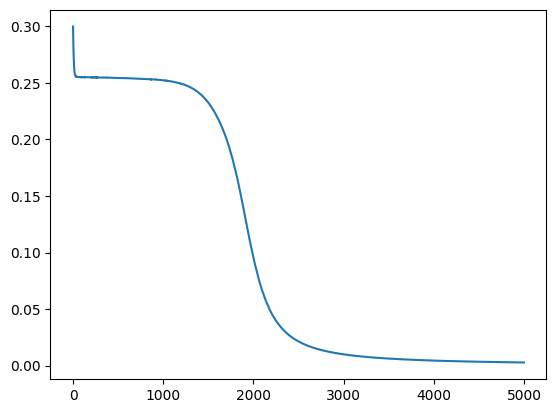

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])

# 

## 네번째 신경망 네트워크 : NOT
<table align = "left">
    <th> 입력 </th>
    <th> NOT결과 </th>
    <tr> 
        <td> True </td>
        <td> False </td>
    </tr>
    <tr>
        <td> False </td>
        <td> True </td>
    </tr>
</table>

In [30]:
import numpy as np
import tensorflow as tf

x = np.array([1,0])
y = np.array([0,1])
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)
learning_rate = 0.1

for i in range(int(5e3)) :
    total_error = 0
    
    for j in range(len(x)) :
        tmp = x[j] * w + b
        output = tf.math.sigmoid(tmp)
        error = output - y[j]
        w = w - learning_rate * error * x[j]
        b = b - learning_rate * error
        total_error = total_error + error
    
    if i % 500 == 499 :
        if i == 499 : 
            pass
        else :
            print("[",i+1,"] error : ", total_error.numpy(), " slope : ", w.numpy()," intercept : ", b.numpy(), sep="")

[1000] error : [-0.01048147] slope : [-7.2846146] intercept : [3.4343581]
[1500] error : [-0.00692589] slope : [-8.126837] intercept : [3.8572836]
[2000] error : [-0.00516364] slope : [-8.720841] intercept : [4.1551642]
[2500] error : [-0.00411342] slope : [-9.17959] intercept : [4.3850603]
[3000] error : [-0.00341706] slope : [-9.553212] intercept : [4.5722127]
[3500] error : [-0.0029217] slope : [-9.868322] intercept : [4.730012]
[4000] error : [-0.00255146] slope : [-10.140742] intercept : [4.8664036]
[4500] error : [-0.00226423] slope : [-10.380648] intercept : [4.986498]
[5000] error : [-0.00203507] slope : [-10.594961] intercept : [5.093766]


In [32]:
for i in range(len(x)) : 
    print("Input :", x[i], "Output :", tf.math.sigmoid(x[i]*w+b))

Input : 1 Output : tf.Tensor([0.0040653], shape=(1,), dtype=float32)
Input : 0 Output : tf.Tensor([0.99390256], shape=(1,), dtype=float32)
